# IVPTestSuite: Notebook Mode


## (0) Prepare environment

In [1]:
#if packages not yet install, i.e. run Pkg.add("IVPTestSuite")
using IVPTestSuite
using ODE
using Sundials
using DASSL

## (1) Select ODE solvers
Select which solvers to use. Setting `solvers = [all]` will include all possible solvers. Options are:
- ODE.jl solvers
    - Stiff ODE Adaptive solvers
        - `ODE.ode23` (Rosenbrock)
    - Stiff ODE Fixed solvers
        - `ODE.ode4s_kr` 
        - `ODE.ode4s_s` 
    - Nonstiff ODE Adaptive solvers
        - `ODE.ode113` (multistep)
        - `ODE.ode78`
        - `ODE.ode45_fe`
        - `ODE.ode45_fe`
        - `ODE.ode23s` (Rosenbrock)
    - Nonstiff ODE Fixed solvers
        - `ODE.ode2_heun` 
        - `ODE.ode4ms` 
        - `ODE.ode1` 
        - `ODE.ode5ms`
        - `ODE.ode4am`
        - `ODE.ode4`
- Sundial solvers
    - Stiff ODE Adaptive solvers
        - `Sundials.CVode` 
    - Stiff DAE Adaptive solvers
        - Sundials.IDASolve 
- DASSL Stiff DAE Adaptive solvers
    - DASSL.dasslSolve 

In [2]:
solvers = [all]

# You may also select a subsection of solvers to test
# ex: testsolvers = [ODE.ode45, ODE.4ms]

1-element Array{Function,1}:
 all

## (2) Configure tolerance range for solvers

In [3]:
# For fixed step solvers
ntsteps = vcat(collect(10.^(1:4)), 500_000)

5-element Array{Int64,1}:
     10
    100
   1000
  10000
 500000

In [4]:
# For adaptive solvers
abstols = 10.0.^(-5:-1:-11)

7-element Array{Float64,1}:
 1.0e-5 
 1.0e-6 
 1.0e-7 
 1.0e-8 
 1.0e-9 
 1.0e-10
 1.0e-11

## (3) Select test problems
Select which test cases to use. Options are:
- Stiff problems
    - [Brusselator with 1D diffusion](https://en.wikipedia.org/wiki/Brusselator) (:bruss1d)
    - [Chemical Akzo Nobel](https://archimede.dm.uniba.it/~testset/problems/chemakzo.php) (:chemakzo)
    - [Rober](https://archimede.dm.uniba.it/~testset/problems/rober.php) (:rober)
    - [HIRES](https://archimede.dm.uniba.it/~testset/problems/hires.php) (:hires)
    - [Van de Pol](https://archimede.dm.uniba.it/~testset/problems/vdpol.php) (:vdpol)
- Nonstiff problems
    - [Pleidas](https://archimede.dm.uniba.it/~testset/problems/plei.php) (:plei)
    - [Threebody](https://en.wikipedia.org/wiki/Three-body_problem) (:threebody)
- OR `:all` which selects all of the above    

In [5]:
cases = [:all]

# You may also select a subsection of cases to test
# ex: cases = [:plei,:hires]

1-element Array{Symbol,1}:
 :all

## (4) Accuracy, Runtime, and Memory Results

An example output form for results of a given test case paired with a ODE solver is the following:

`Running test case` __[test case used]__ `with solver` __[ODE solver used]__

`Running test 1 of 3: sig. digits=` __[sig. digits of accurary]__ `, walltime=` __[runtime]__`, memory= `__[memory usage]__

`Running test 2 of 3: sig. digits=` __[sig. digits of accurary]__ `, walltime=` __[runtime]__`, memory= `__[memory usage]__

`Running test 3 of 3: sig. digits=` __[sig. digits of accurary]__ `, walltime=` __[runtime]__`, memory= `__[memory usage]__



In [6]:
results = runsuite(testsolvers = solvers, testcases = cases, testabstols = abstols, testntsteps = ntsteps, verbose = true);


Running test case bruss1d with solver ODE.ode23s
Running test 1 of 7: sig. digits= 3.391075024433956, walltime= 0.681383807s, memory= 435.0MB
Running test 2 of 7: sig. digits= 4.068350511153728, walltime= 1.456889729s, memory= 930.0MB
Running test 3 of 7: sig. digits= 4.739982478604418, walltime= 3.289671507s, memory= 1998.0MB
Running test 4 of 7: sig. digits= 5.40887261413045, walltime= 7.497248876s, memory= 4301.0MB
Running test 5 of 7: sig. digits= 6.076637525733111, walltime= 14.924087197s, memory= 9254.0MB
Running test 6 of 7: sig. digits= 6.743786470461314, walltime= 31.708044917s, memory= 19931.0MB
Running test 7 of 7: sig. digits= 7.41068692269286, walltime= 74.466604478s, memory= 42923.0MB

Running test case vdpol with solver ODE.ode23s
Running test 1 of 7: sig. digits= 3.948944798395215, walltime= 0.08404416s, memory= 42.0MB
Running test 2 of 7: sig. digits= 4.610889954109802, walltime= 0.211267581s, memory= 108.0MB
Running test 3 of 7: sig. digits= 5.297260798830431, wallti

## (5) Plots

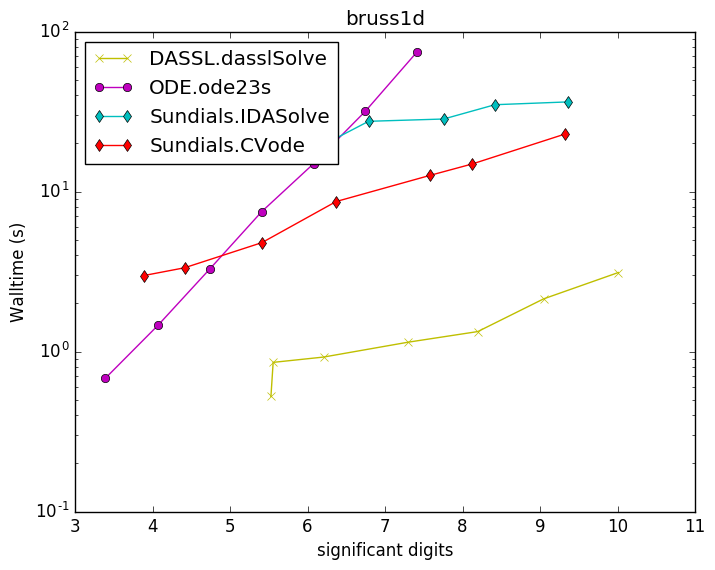

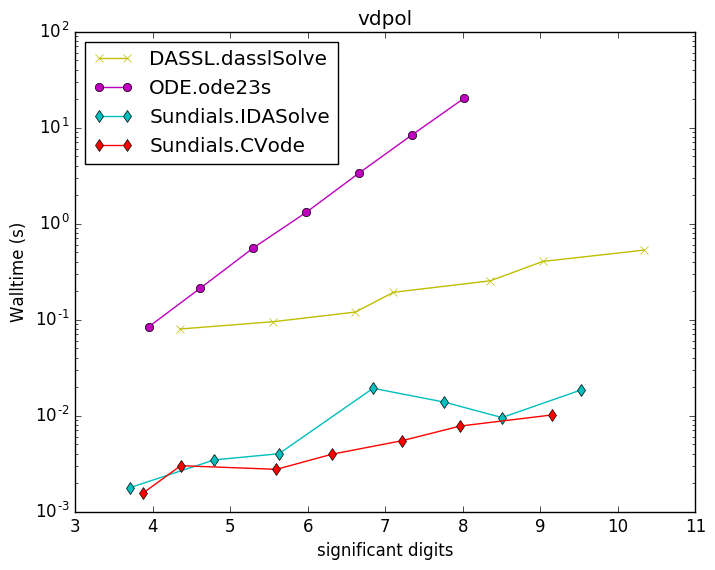

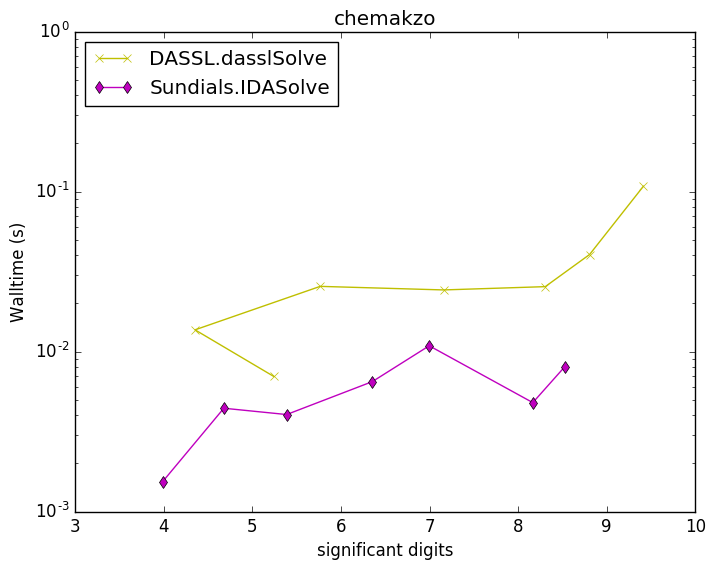

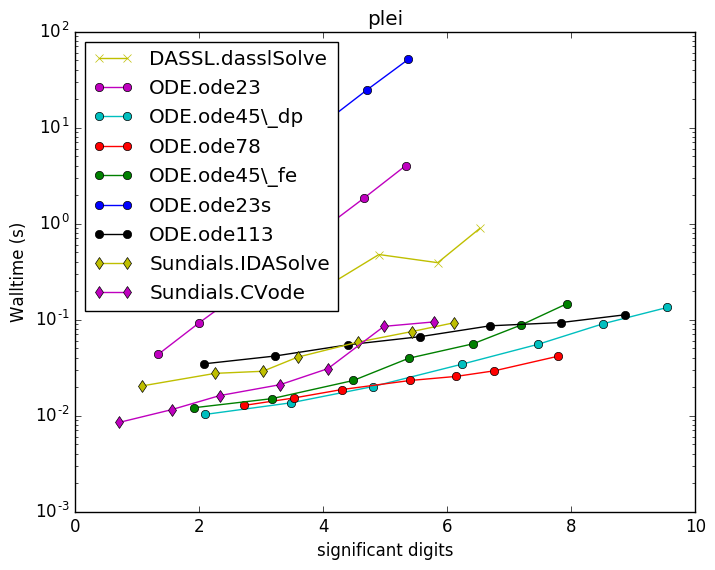

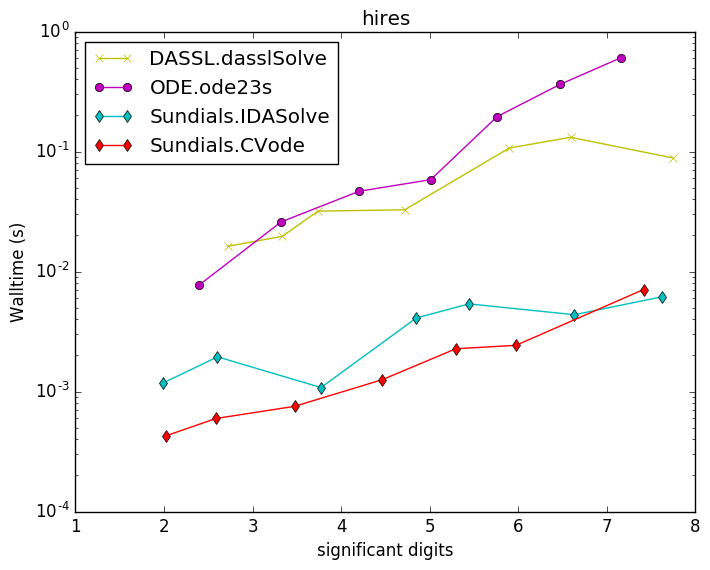

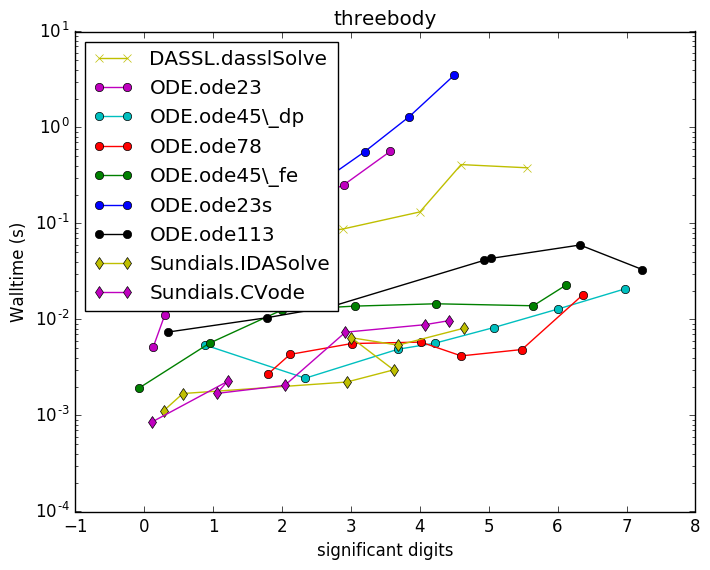

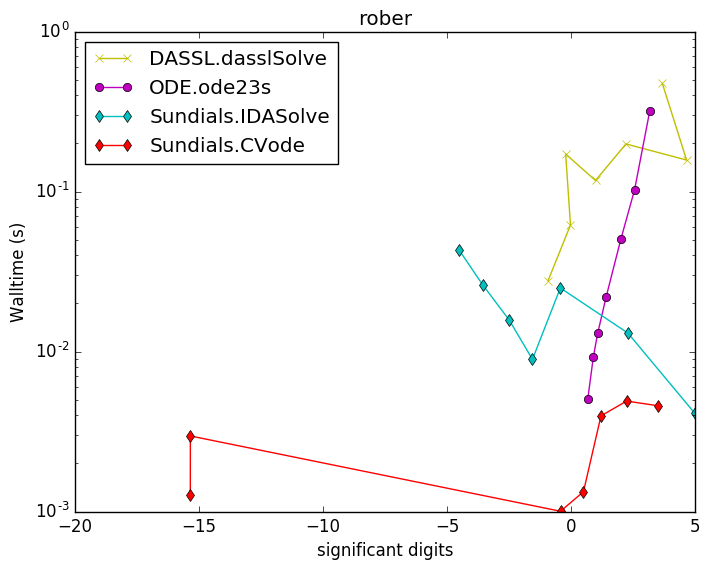

In [7]:
PyPlot.svg(true)
plotsuite(results)

## (6) Saving Results
Quickest way to save these resuls is to export this notebook as a HTML or PDF.